In [2]:
# Daeseob Lim
# 7/24/2019
# Code studied from Deep Learning with Python
# Credits/Author: Francois Chollet

# Regression; Predicting house prices

import keras
from keras.datasets import boston_housing

# Getting data
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


Data format
1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

Target is in thousands of dollars

In [3]:
# Because the data covers a wide range of numbers, learning will be more difficult. Thus, we will normalize the data.
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [5]:
# Creating our model
from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

We are using mean squred error because we are solving a regression problem. MSE is widely used for regression problems. We are also using mean absolute error which finds the absolute value of the difference between the predictions and target.

In [6]:
# We are using k-fold validation
# K-fold validation splits up the data by k, then instatiates k identical model with varying train data sets and validation data
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

W0724 15:05:05.445132  7108 deprecation_wrapper.py:119] From C:\Users\theda\Anaconda3\envs\hello-tf\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 15:05:05.554932  7108 deprecation_wrapper.py:119] From C:\Users\theda\Anaconda3\envs\hello-tf\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 15:05:05.571658  7108 deprecation_wrapper.py:119] From C:\Users\theda\Anaconda3\envs\hello-tf\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



processing fold # 0


W0724 15:05:05.643840  7108 deprecation_wrapper.py:119] From C:\Users\theda\Anaconda3\envs\hello-tf\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0724 15:05:05.825075  7108 deprecation_wrapper.py:119] From C:\Users\theda\Anaconda3\envs\hello-tf\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0724 15:05:05.833445  7108 deprecation_wrapper.py:119] From C:\Users\theda\Anaconda3\envs\hello-tf\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



processing fold # 1
processing fold # 2
processing fold # 3


2.468851412286853

In [7]:
print(all_scores)
print(np.mean(all_scores))

[2.0715820600490757, 2.325138802575593, 3.025912265966434, 2.4527725205563082]
2.468851412286853


As suggested by above, our model is on average $2,400 off it's target. To determine the optimal number of epochs, we will run rebuild a model that learns up to 500 epochs and plot it.

In [9]:
from keras import backend as k
k.clear_session()

k = 4
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

# Computing the average of the per epoch mean absolute error
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]



processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


<Figure size 640x480 with 1 Axes>

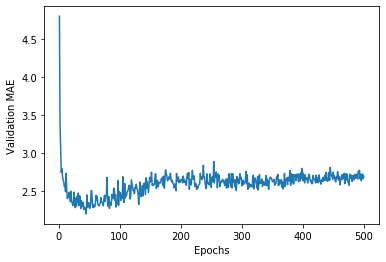

In [10]:
# Plotting
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

It seems like around 80 epochs the mean absolute error stops improving. We will adjust our model accordingly.

In [11]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(test_mae_score)

102/102 [==============================] - 0s 615us/step
2.6716011552249683


Still off by a significant amount of $2,600.